# Tara UMAP

In [13]:
from importlib import reload
import os
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

import seaborn as sns

from oceancolor.tara import io
from oceancolor.tara import explore

from ulmo.plotting import plotting

# Load up spectra for plotting

In [2]:
rwv_nm, cull_raph, cull_rsig, tara_tbl = explore.prep_spectra()

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:250: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:251: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: divide by zero encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: invalid value encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)


# Load up UMAP results (unnormalize)

In [3]:
umap_file = os.path.join(
        os.getenv('OS_COLOR'), 'Tara', 'UMAP', 'Tara_UMAP_abs.parquet')

In [4]:
umap_tbl = pandas.read_parquet(umap_file)

# Explore

In [5]:
abs_regions = {}
abs_regions['A'] = [0, -6]
abs_regions['B'] = [-3, 0.]
abs_regions['C'] = [-2, 6.]
abs_regions['D'] = [9, 6.]
abs_regions['E'] = [10, 12.5]
abs_regions['F'] = [16, -1]
abs_regions['G'] = [11.5, 2.7]

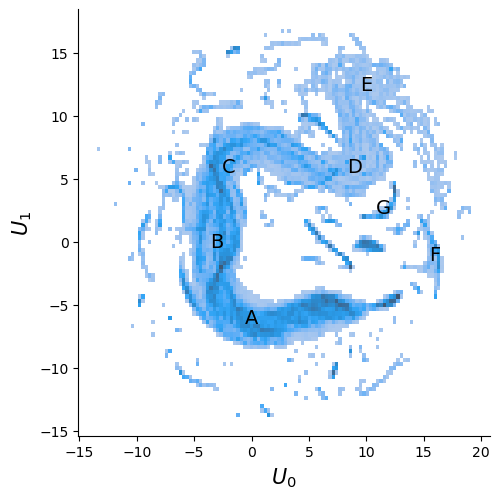

In [6]:
fg = sns.displot(umap_tbl, x='U0', y='U1')
fg.set_xlabels(label=r'$U_0$', fontsize=15)
fg.set_ylabels(label=r'$U_1$', fontsize=15)

# Plot on regions
for key in abs_regions.keys():
    fg.axes[0][0].text(abs_regions[key][0], abs_regions[key][1], 
                       key, color='k', fontsize=14., ha='center', va='center')

plt.savefig('Tara_UMAP_unnorm.png', dpi=300)
plt.show()

In [7]:
fg.axes[0]

array([<Axes: xlabel='$U_0$', ylabel='$U_1$'>], dtype=object)

## Explore a few regions

In [8]:
def spec_from_region(region, raph, utbl, navg:int=100):
    #
    dist2 = (utbl.U0-region[0])**2 + (utbl.U1-region[1])
    #
    top = np.argsort(dist2.values)[:navg]
    # Average
    avg_spec = np.mean(raph[top,...], axis=0)
    # Return
    return avg_spec

## Grab the average spectra

In [9]:
abs_specs = []
for key in abs_regions.keys():
    spec = spec_from_region(abs_regions[key], cull_raph, umap_tbl)
    abs_specs.append(spec)

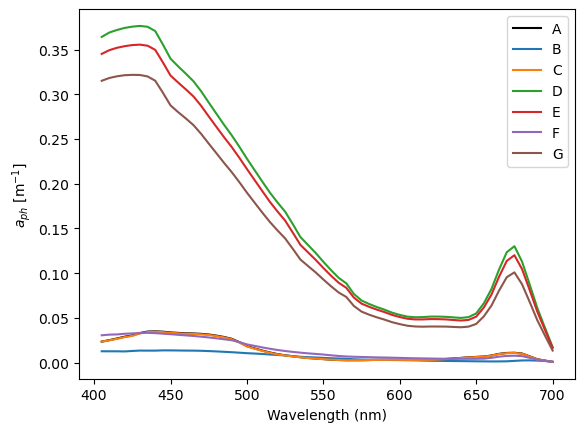

In [10]:
plt.clf()
ax = plt.gca()

for ss, key in enumerate(abs_regions.keys()):
    if ss == 0:
        clr = 'k'
    else:
        clr = None
    ax.plot(rwv_nm, abs_specs[ss], label=key, color=clr)

ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a_{ph}$ [m$^{-1}$]')

plt.savefig('example_spec_unnorm.png', dpi=300)
plt.show()

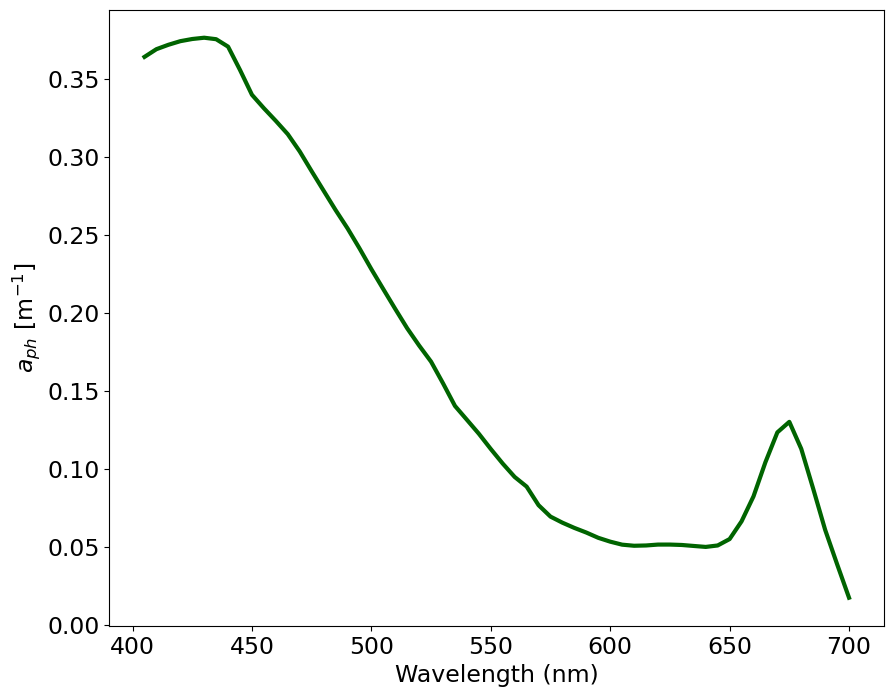

In [18]:
fig = plt.figure(figsize=(10,8))
plt.clf()
ax = plt.gca()

for ss, key in enumerate(abs_regions.keys()):
    if key != 'D':
        continue
    if ss == 0:
        clr = 'k'
    else:
        clr = None
    clr = 'darkgreen'
    ax.plot(rwv_nm, abs_specs[ss], label=key, color=clr, lw=3)

#ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a_{ph}$ [m$^{-1}$]')

plotting.set_fontsize(ax, 17.)

plt.savefig('example_one_spec.png', dpi=300)
plt.show()

----

# Normalized

In [94]:
reload(explore)
process = dict(Norm_PDF=True)
rwv_nm, cull_raph_norm, cull_rsig, tara_tbl = explore.prep_spectra(process=process)

/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:248: RuntimeWarning: invalid value encountered in divide
  isum = np.nansum(values[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/spectra.py:249: RuntimeWarning: invalid value encountered in divide
  esum = np.nansum(err_vals[gd]*mask[gd], axis=0) / np.sum(mask[gd],axis=0)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: divide by zero encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)
/home/xavier/Projects/Oceanography/python/ocean-color/oceancolor/tara/explore.py:35: RuntimeWarning: invalid value encountered in divide
  med_sn = np.nanmedian(r_aph/r_sig, axis=1)


Normalizing the PDF


In [46]:
umap_fileN = os.path.join(
        os.getenv('OS_COLOR'), 'Tara', 'UMAP', 'Tara_UMAP_norm.parquet')
umap_tblN = pandas.read_parquet(umap_fileN)

## Define the regions

In [112]:
norm_regions = {}
norm_regions['A'] = [8, 2.5]
norm_regions['B'] = [4, 0.]
norm_regions['C'] = [9, -6.5]
#
norm_regions['D'] = [-4.5, 8.3]
norm_regions['E'] = [21.5, -6]
norm_regions['F'] = [12, 7]
norm_regions['G'] = [17, -7]

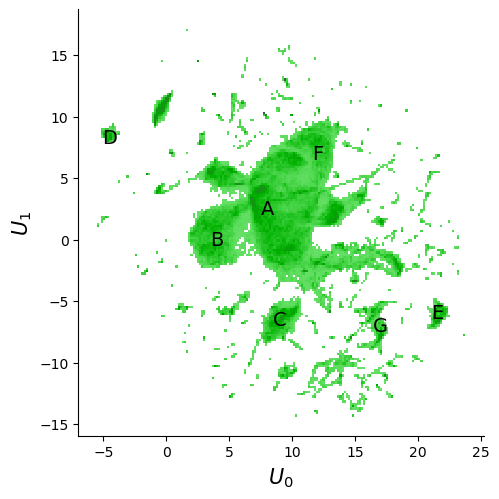

In [118]:
fg = sns.displot(umap_tblN, x='U0', y='U1', color='green')

fg.set_xlabels(label=r'$U_0$', fontsize=15)
fg.set_ylabels(label=r'$U_1$', fontsize=15)

# Plot on regions
for key in abs_regions.keys():
    fg.axes[0][0].text(norm_regions[key][0], norm_regions[key][1], 
                       key, color='k', fontsize=14., ha='center', va='center')

plt.savefig('Tara_UMAP_norm.png', dpi=300)

plt.show()

In [114]:
# D, E use navg=30

norm_specs = []
for key in abs_regions.keys():
    if key in ['D', 'E']:
        navg = 30
    else:
        navg = 100
    spec = spec_from_region(norm_regions[key], cull_raph_norm, umap_tblN, navg=navg)
    norm_specs.append(spec)

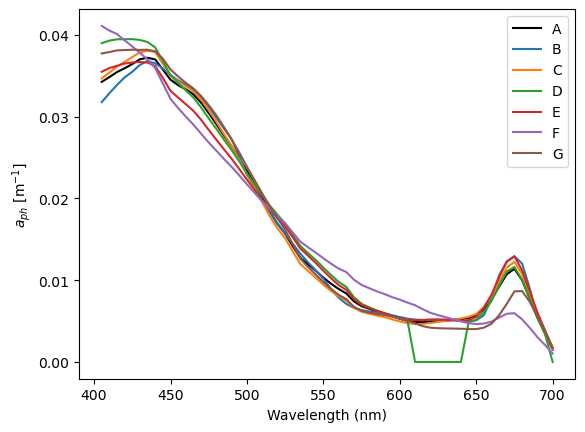

In [117]:
plt.clf()
ax = plt.gca()

for ss, key in enumerate(norm_regions.keys()):
    if ss == 0:
        clr = 'k'
    else:
        clr = None
    ax.plot(rwv_nm, norm_specs[ss], label=key, color=clr)

ax.legend()
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$a_{ph}$ [m$^{-1}$]')

plt.savefig('example_spec_norm.png', dpi=300)

plt.show()